<a href="https://colab.research.google.com/github/yo3333333/CID/blob/main/Hands-on%203%3A%20Kmeans%20Notebook%20(Tutorial)/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de la tecnica**


---

El K-Means es un algoritmo de aprendizaje no supervisado utilizado para agrupar datos en función de su similitud. Su objetivo es dividir un conjunto de datos en K grupos o clústeres, de modo que los elementos dentro de un mismo grupo sean similares entre sí y diferentes de los que pertenecen a otros grupos.

**Como funciona:**


1. Inicialización: se eligen aleatoriamente K centroides (puntos representativos de cada grupo).
2. Asignación: cada punto de datos se asigna al centroide más cercano (según la distancia euclidiana).
3.  Actualización: se recalculan los centroides como la media de todos los puntos asignados a cada clúster.
4. Repetición: los pasos 2 y 3 se repiten hasta que los centroides dejan de moverse significativamente o se alcanza un número máximo de iteraciones.





**Modelo Matematico**


---





En el modelo de kmeans primero se determina cuantos centroides se van a usar y se incializan valores aleatorios despues se calcula la distancia de cada punto respecto a los centroide, esto se hace por medio de la distancia euclidiana la cual se calcula por la siguiente formula:


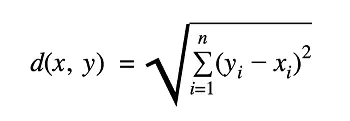

Una vez asignados todos los puntos se cambian de posición los centroides para que esten en el medio de todos los casos que pertenencen a el, esto se hace con la formula:

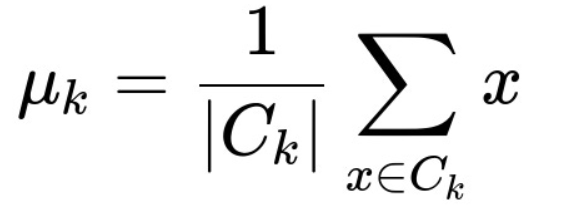


Este proceso se repite de forma iterativa hasta que los centroides convergen. La convergencia ocurre cuando la posición de los centroides deja de cambiar (o cambia muy poco) respecto a la iteración anterior, o bien cuando se alcanza un número máximo de iteraciones establecido previamente.

**1.3 Descripción de las librerias Pandas, scikit-learn y matplotlib:**


---



**Descripción de la librería pandas**

Pandas es una biblioteca de Python diseñada para la manipulación y análisis de datos. Permite trabajar con estructuras de datos como DataFrame, que funcionan como tablas con filas y columnas.

Ofrece herramientas para leer archivos (como CSV o Excel), seleccionar columnas, filtrar información y preparar los datos antes de aplicar modelos de Machine Learning.

En este programa, pandas se utiliza para cargar el dataset Social_Network_Ads.csv y extraer las columnas necesarias para el entrenamiento del perceptrón.



---


**Descripción de la librería scikit-learn**

Scikit-learn es una biblioteca de Python utilizada para crear y evaluar modelos de Machine Learning. Incluye herramientas para entrenar algoritmos, preprocesar datos y medir el rendimiento de los modelos.

En este programa, se usa para dividir los datos, normalizarlos, entrenar el perceptrón y evaluar su exactitud mediante sus distintos módulos (model_selection, preprocessing, linear_model, metrics).


---
**Descripción de matplotlib**

Es una biblioteca de Python utilizada para crear gráficos y visualizar datos de forma sencilla. Permite generar diagramas como líneas, barras, dispersión, histogramas y más.


---





In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Objetivo: Con un algorito de Kmeans agrupar distintas personas basandose en su altura y peso de los mismos con la información que se encuentra en hw_200.csv**

**Implementación del codigo**

Cargar el dataset que se va a usar, en este caso se van a usar  todas las columnas del df (Altura y Peso) menos el id


In [70]:
data = pd.read_csv("hw_200.csv")
X = data.drop(columns={"Index"})

Escalar los datos

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Se crea y entrena el modelo con los datos del dataset indicando que se quiere trabajar con dos clusters y  que los primeros dos clusters van a iniciar de forma aleatoria

In [86]:
kmeans = KMeans(n_clusters=4, init='random')
y_kmeans = kmeans.fit_predict(X_scaled)

Se grafica el resultado del algoritmo Kmeans con el dataset hw_200.csv, para ver graficamente como quedaron agrupados los dos grupos

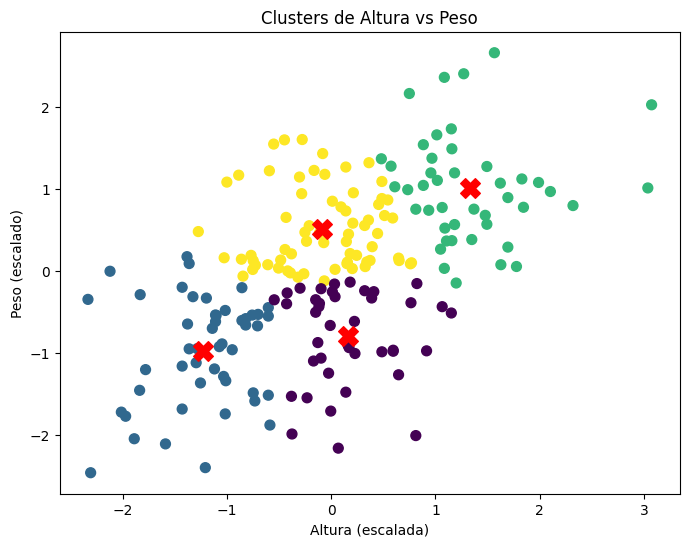

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, marker='X')  # Centroides
plt.xlabel('Altura (escalada)')
plt.ylabel('Peso (escalado)')
plt.title('Clusters de Altura vs Peso')
plt.show()



**1.4 Pipeline**

---


**Preprocesamiento**


---



Se realiza un análisis estadístico inicial de las variables y un gráfico de dispersión para observar la relación entre la edad y el salario estimado.

            Index      Height      Weight
count  200.000000  200.000000  200.000000
mean   100.500000   67.949800  127.221950
std     57.879185    1.940363   11.960959
min      1.000000   63.430000   97.900000
25%     50.750000   66.522500  119.895000
50%    100.500000   67.935000  127.875000
75%    150.250000   69.202500  136.097500
max    200.000000   73.900000  158.960000


/tmp/ipython-input-1869651823.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Height'], data['Weight'], cmap='bwr')


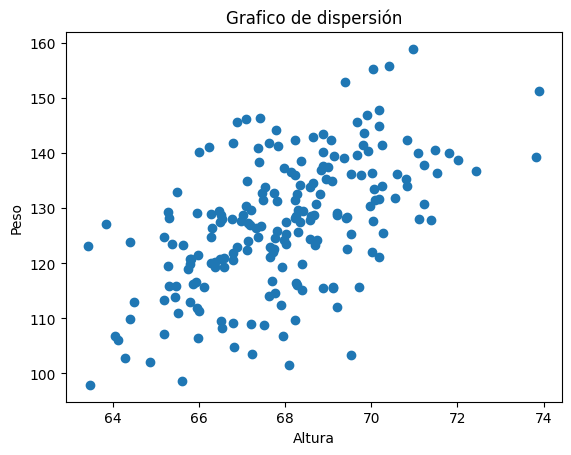

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el dataset
data = pd.read_csv("hw_200.csv")

# Análisis estadístico básico
print(data.describe())  # Promedio, desviación estándar, valores mínimos y máximos

# Gráfico de dispersión
plt.scatter(data['Height'], data['Weight'])
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title("Grafico de dispersión")
plt.show()


Se puede observar que en el dataset contiene 200 datos de diferentes personas, la altura promedio es de 67 pulgadas y peso de 127 libras, el grafico de dispersion muestra que entre mas altura mas peso indicando una correlación positiva


**Prediction**

---



Se hizo la siguiente función para agrupar cualquier caso nuevo en donde pasemos su edad y su salario, en esta se escalan los datos que recibimos y se usa el modelo de knn para predecir si el usuario compra o no un producto de acuerdo a lo que devolvio nuestro modelo

In [65]:
import numpy as np

def predict_cluster(pattern):

    # Convertir a array 2D
    pattern_array = np.array(pattern).reshape(1, -1)

    # Escalar usando el mismo scaler que usamos para entrenar
    pattern_scaled = scaler.transform(pattern_array)

    # Predecir el cluster
    cluster = kmeans.predict(pattern_scaled)

    print(f"El patrón {pattern} pertenece al cluster: {cluster[0]}")
    return cluster[0]




**Usamos la función de prediction para evaluar a que cluster pertenece un nuevo dato, en este caso vamos a pasar la altura de 160 y el peso de 55**

In [66]:
nuevo_patron = [160, 55]
predict_cluster(nuevo_patron)

El patrón [160, 55] pertenece al cluster: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int32(0)

**Model Evaluation**


---



Se evalua el modelo calculando su inertia(Nos dice la distancia media entre los puntos y su centroide), silhouette_score (Mide que tan separados estan los clusters entre si) y Calinski-Harabasz Index (Mide que tan distintos estan los grupos formados)

In [88]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X_scaled, y_kmeans))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, y_kmeans))

Inertia: 113.45022105726892
Silhouette Score: 0.33195841896200706
Calinski-Harabasz Index: 165.01732698086224


Esta metrica nos indican que los grupos que encontro el modelo tienen similitudes entre si y que no fue la mejor separación, para mejorar esto se puede aumentar el numero de clusters o aumentar el numero de variables, el objetivo es disminuir los valores de inertia y aumentar los Silhouette y Calinski

**Referencias**



*  Kavlakoglu, E., & Winland, V. (2024, June 26). K-Means Clustering. Ibm.com. https://www.ibm.com/mx-es/think/topics/k-means-clustering

*  Ramírez, L. (2024, October 30). Algoritmo k-means: ¿Qué es y cómo funciona? Thinking for Innovation. https://www.iebschool.com/hub/algoritmo-k-means-que-es-y-como-funciona-big-data/


